### Phân tích dữ liệu bệnh tiểu đường

## MỤC TIÊU VÀ KHÁI QUÁT BỘ DỮ LIỆU

### Mục tiêu phân tích: 
Phân tích bộ dữ liệu bệnh tiểu đường của phụ nữ gốc Pima để tìm hiểu mối quan hệ giữa các chỉ số sức khỏe (như Glucose, BMI, Age, Insulin) và khả năng mắc bệnh.

### Bộ dữ liệu: 
Bộ dữ liệu gồm **768 bản ghi** và **9 cột** thông tin, bao gồm:

- **Pregnancies:** Số lần mang thai của bệnh nhân.  
- **Glucose:** Nồng độ glucose trong huyết tương sau khi nhịn ăn (mg/dL).  
- **BloodPressure:** Huyết áp tâm trương (mm Hg).  
- **SkinThickness:** Độ dày của lớp da dưới cánh tay (mm).  
- **Insulin:** Nồng độ insulin huyết thanh (μU/mL).  
- **BMI (Body Mass Index):** Chỉ số khối cơ thể, tính bằng công thức *cân nặng (kg) / (chiều cao (m))²*.  
- **DiabetesPedigreeFunction:** Chỉ số phản ánh yếu tố di truyền liên quan đến bệnh tiểu đường.  
- **Age:** Tuổi của bệnh nhân (tính theo năm).  
- **Outcome:** Biến mục tiêu, cho biết người đó **có mắc bệnh tiểu đường hay không**
  (*0 = không mắc, 1 = mắc bệnh*).

Bộ dữ liệu này thường được sử dụng trong các bài toán **phân loại y học**, đặc biệt là dự đoán **nguy cơ mắc bệnh tiểu đường** dựa trên các yếu tố sức khỏe và lối sống của người bệnh.  
Với cấu trúc dữ liệu khá cân bằng và các biến có ý nghĩa sinh học rõ ràng, đây là một tập dữ liệu điển hình để **thực hành phân tích dữ liệu, trực quan hóa, và xây dựng mô hình học máy**
(chẳng hạn như *Logistic Regression, Random Forest, hoặc Neural Network*) trong lĩnh vực **y sinh học**.
"""


### Import thư viện và đọc dữ liệu từ file csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("diabetes.csv")

In [4]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

### Kiểm tra dữ liệu 

In [5]:
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")

print(df.dtypes)

df.info()

print("\n=== GIÁ TRỊ THIẾU ===")
missing_values = df.isnull().sum()
print(missing_values)

print("\n=== TỔNG SỐ GIÁ TRỊ THIẾU ===")
print(f"Tổng giá trị thiếu: {df.isnull().sum().sum()}")

Số dòng: 768
Số cột: 9
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-n

### Thống kê mô tả và tỷ lệ người mắc bệnh

In [8]:
print("\n=== THỐNG KÊ MÔ TẢ ===")
print(df.describe())


=== THỐNG KÊ MÔ TẢ ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.

### Vẽ biểu đồ phân phối và tương quan (Histogram, Boxplot, Heatmap)

In [16]:
plt.figure(figsize=(5, 4))
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.title('Tỷ lệ người mắc và không mắc bệnh tiểu đường', fontsize=14)
plt.xticks([0, 1], ['Không mắc (0)', 'Mắc bệnh (1)'])
plt.show()

/var/folders/76/7qnq78756db096lybc5jxpsm0000gn/T/ipykernel_4782/250800822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='pastel')


In [9]:
df.hist(figsize=(14, 10), bins=10, edgecolor='black')
plt.suptitle('Histogram – Phân phối các thuộc tính trong bộ dữ liệu tiểu đường', fontsize=16)
plt.show()

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot – Phân phối và ngoại lệ của các biến')
plt.xticks(rotation=45)
plt.show()

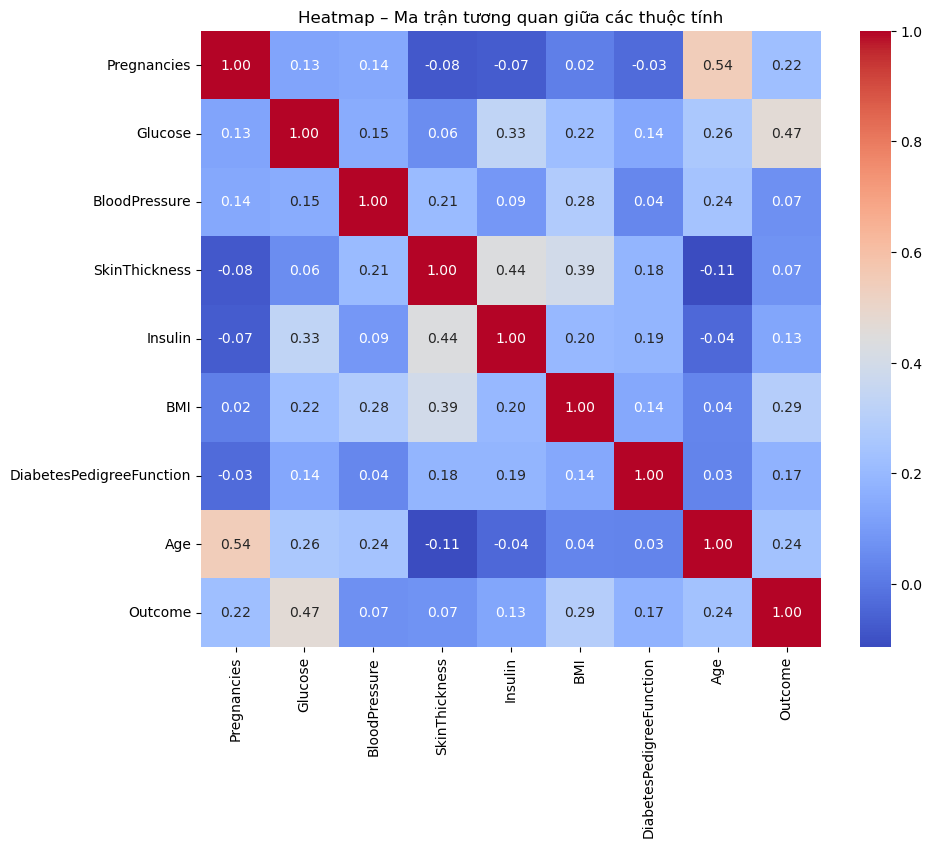

In [13]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap – Ma trận tương quan giữa các thuộc tính')
plt.show()